In [10]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns

In [11]:
# загрузим данные
df = pd.read_csv('../../data/pokemon.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
# df.head()

* n_clusters — количество кластеров; по умолчанию — 8.
* random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.
Визуализируем результаты:

In [15]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

In [21]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions_2 = spectral_clustering.labels_

Text(0.5, 1.0, 'n_clusters=4')

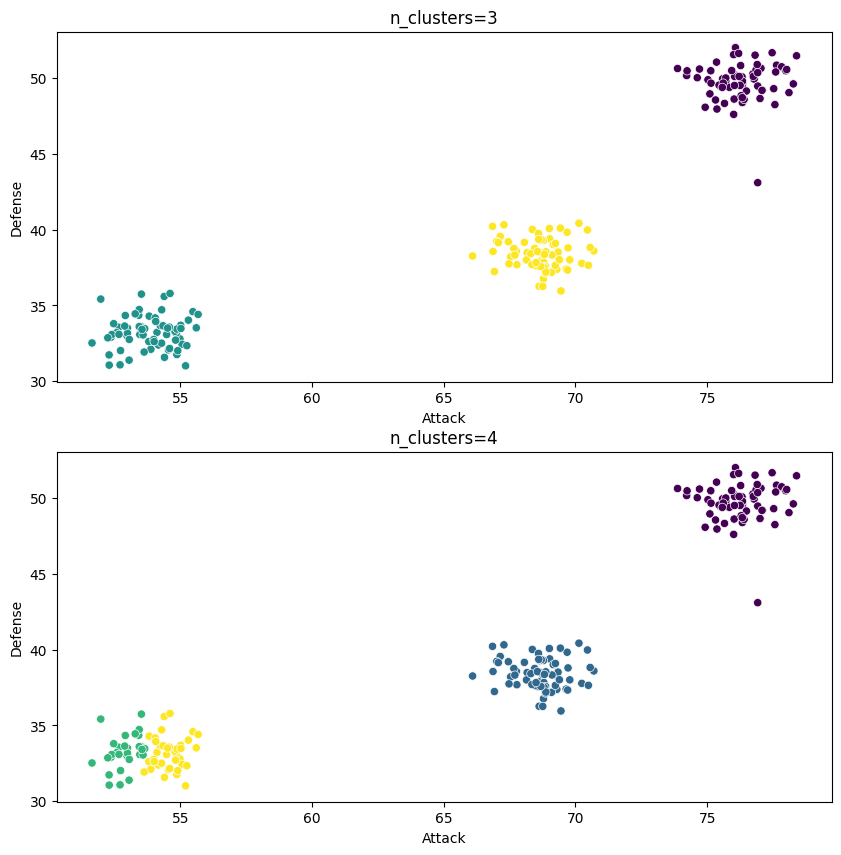

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions, ax=axes[0]).set_title('n_clusters=3')
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions_2, ax=axes[1]).set_title('n_clusters=4')

# Дополнительно

In [1]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

In [5]:
img = circle1 + circle2 + circle3 + circle4

# Мы используем маску, ограничивающую передний план: проблема, которая нас здесь
# интересует, заключается не в отделении объектов от фона,
# а в их отделении друг от друга.
mask = img.astype(bool) 

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

In [6]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

In [7]:
graph.data = np.exp(-graph.data / graph.data.std())

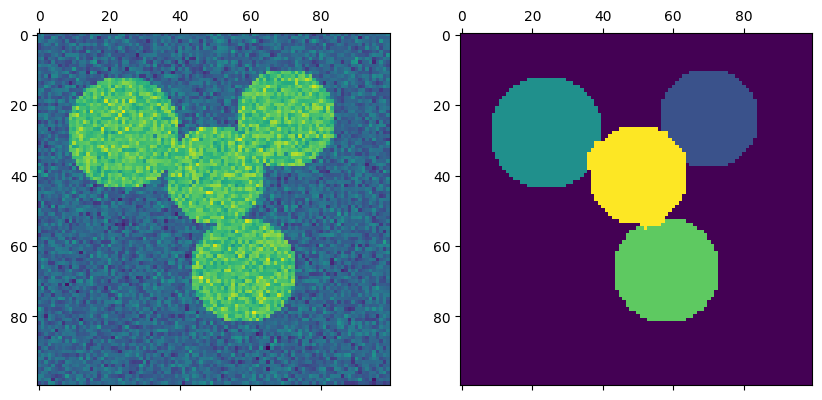

In [8]:
import matplotlib.pyplot as plt

from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

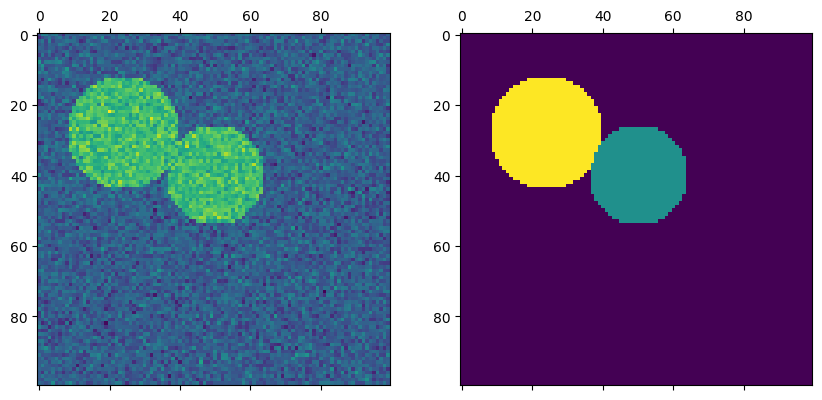

In [9]:
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()